<h3 style="color: #000000; font-weight: bold;"> Financial Bot Management </h3>

<h4 style="color: #000000; font-weight: bold;"> ETL </h4>

In [11]:
#libraries
import pandas as pd
import numpy as np
from faker import Faker
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4 style="color: #000000;"> Generating the Data </h4>


<h5 style="color: #000000;"> Expenses table </h5>

In [2]:
np.random.seed(42)
fake = Faker()

num_users = 250  
num_months = 12  

names = [fake.name() for _ in range(num_users)]
user_ids = np.arange(10001, 10001 + num_users)  # IDs de 10001 a 10250
user_ids_repeated = np.tile(user_ids, num_months)
months = np.repeat(np.arange(1, num_months + 1), num_users)

names_repeated = np.tile(names, num_months)

salaries = np.random.randint(900, 2500, size=num_users * num_months)  # Salários aleatórios
housing = np.random.randint(200, 900, size=num_users * num_months)  # Despesas com habitação
fixed_expenses = np.random.randint(100, 300, size=num_users * num_months)  # Despesas fixas
transport = np.random.randint(100, 300, size=num_users * num_months)  # Despesas com transporte
food = np.random.randint(200, 400, size=num_users * num_months)  # Despesas com alimentação
health = np.random.randint(50, 200, size=num_users * num_months)  # Despesas com saúde
education = np.random.randint(100, 600, size=num_users * num_months)  # Despesas com educação
communication = np.random.randint(50, 100, size=num_users * num_months)  # Despesas com comunicação
other = np.random.randint(50, 100, size=num_users * num_months)  # Outras despesas
investments_and_savings = np.random.randint(50, 100, size=num_users * num_months)  # Investimentos e poupanças
credits_and_debts = np.random.randint(100, 200, size=num_users * num_months)  # Créditos e dívidas

# dataframe
df = pd.DataFrame({
    'user_id': user_ids_repeated,
    'name': names_repeated,
    'month': months,
    'salary': salaries,
    'Housing': housing,
    'Fixed Expenses': fixed_expenses,
    'Transport': transport,
    'Food': food,
    'Health': health,
    'Education': education,
    'Communication': communication,
    'Other': other,
    'Investments and Savings': investments_and_savings,
    'Credits and Debts': credits_and_debts,
})

# Calculate total expenses (sum of all expenses for each user)
df['total_expenses'] = (
    df['Housing'] + df['Fixed Expenses'] + df['Transport'] + df['Food'] +
    df['Health'] + df['Education'] + df['Communication'] + df['Other'] +
    df['Investments and Savings'] + df['Credits and Debts']
)

# Calculate balance (salary - total expenses)
df['balance'] = df['salary'] - df['total_expenses']

# Show the first few rows of the dataframe
df.head(5)


,user_id,name,month,salary,Housing,Fixed Expenses,Transport,Food,Health,Education,Communication,Other,Investments and Savings,Credits and Debts,total_expenses,balance
0,10001,Heidi David,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728
1,10002,John Hunt,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292
2,10003,Edward Russell,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797
3,10004,Patrick Fowler,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121
4,10005,Michael Silva,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181


In [3]:
df_daniel = df[df['name'] == 'Anne Ramos']
data = df.copy()

<h5 style="color: #000000;"> Finantial Goal table </h5>

In [4]:
Finacial_table = data[['user_id','name']].copy()
Finacial_table.head()

goal_types = ['Trip', 'House Purchase', 'Retirement', 'Emergency Fund']
Finacial_table['financial_goals'] = np.random.choice(goal_types, size=data.shape[0])  # Um objetivo para cada usuário
# Finacial_table['target_months'] = np.random.randint(1, 13, size=data.shape[0])  # Mês alvo entre 6 e 24 meses
Finacial_table['months_to_achieve'] = np.random.randint(6, 12, size=data.shape[0])  # Quantidade de meses para atingir o objetivo
Finacial_table.head(5)

,user_id,name,financial_goals,months_to_achieve
0,10001,Heidi David,House Purchase,9
1,10002,John Hunt,House Purchase,10
2,10003,Edward Russell,Emergency Fund,10
3,10004,Patrick Fowler,Emergency Fund,9
4,10005,Michael Silva,Trip,6


In [41]:
data
Finacial_table

,user_id,name,financial_goals,months_to_achieve
0,10001,Heidi David,House Purchase,9
1,10002,John Hunt,House Purchase,10
2,10003,Edward Russell,Emergency Fund,10
3,10004,Patrick Fowler,Emergency Fund,9
4,10005,Michael Silva,Trip,6
...,...,...,...,...
2995,10246,Samantha Martinez,Emergency Fund,6
2996,10247,Julie Joyce,House Purchase,10
2997,10248,Juan Warren,Retirement,11
2998,10249,Jonathan Heath,Emergency Fund,7


In [108]:
df_daniel = df[df['name'] == 'Heidi David']
df_daniel 

,user_id,name,month,salary,Housing,Fixed Expenses,Transport,Food,Health,Education,Communication,Other,Investments and Savings,Credits and Debts,total_expenses,balance
0,10001,Heidi David,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728
250,10001,Heidi David,2,1666,363,270,255,251,190,282,93,52,55,134,1945,-279
500,10001,Heidi David,3,2112,579,125,202,216,75,587,53,90,89,103,2119,-7
750,10001,Heidi David,4,946,812,291,182,289,185,533,88,97,85,171,2733,-1787
1000,10001,Heidi David,5,1926,230,178,229,350,61,301,67,55,50,123,1644,282
1250,10001,Heidi David,6,2383,655,149,221,329,150,228,65,71,71,167,2106,277
1500,10001,Heidi David,7,2324,764,135,174,275,156,211,84,66,74,112,2051,273
1750,10001,Heidi David,8,961,476,272,170,391,139,292,84,93,68,124,2109,-1148
2000,10001,Heidi David,9,971,438,247,155,378,104,348,53,73,93,132,2021,-1050
2250,10001,Heidi David,10,2174,437,240,125,375,192,462,82,61,66,170,2210,-36


<h5 style="color: #000000;"> Databases </h5>

In [42]:
import pandas as pd
from sqlalchemy import create_engine

# String de conexão com PyMySQL
server = 'localhost:3306'
database = 'FINAL_PROJECT'
username = 'root'
password = '1234'

# Alteração para usar PyMySQL no lugar de mysqlconnector
connection_string = f"mysql+pymysql://{username}:{password}@{server}/{database}"
engine = create_engine(connection_string)

# Salvar o DataFrame no MySQL
data.to_sql('expenses', con=engine, if_exists='replace', index=False)
Finacial_table.to_sql('financial_goals', con=engine, if_exists='replace', index=False)

print("DataFrame salvo no MySQL com sucesso!")


DataFrame salvo no MySQL com sucesso!


<h4 style="color: #000000; font-weight: bold;"> EDA </h4>

In [43]:
engine = create_engine(connection_string)
df = pd.read_sql("SELECT * FROM expenses", engine)
df.head()


,user_id,name,month,salary,Housing,Fixed Expenses,Transport,Food,Health,Education,Communication,Other,Investments and Savings,Credits and Debts,total_expenses,balance
0,10001,Heidi David,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728
1,10002,John Hunt,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292
2,10003,Edward Russell,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797
3,10004,Patrick Fowler,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121
4,10005,Michael Silva,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181


<h5 style="color: #000000;"> loading Function </h5>

In [132]:
# function to load the data
def load_and_preview_data(query, engine):
    df = pd.read_sql(query, engine)
    print(df.head())
    return df

query = "SELECT * FROM expenses"
df = load_and_preview_data(query, engine)

   user_id            name  month  salary  Housing  Fixed Expenses  Transport  \
0    10001     Heidi David      1    2026      832             283        258   
1    10002       John Hunt      1    2359      617             195        168   
2    10003  Edward Russell      1    1760      636             260        203   
3    10004  Patrick Fowler      1    2194      576             272        260   
4    10005   Michael Silva      1    2030      219             263        299   

   Food  Health  Education  Communication  Other  Investments and Savings  \
0   333     135        508             97     52                       58   
1   360     189        173             80     96                       80   
2   382     120        559             86     80                       71   
3   218      95        524             93     76                       94   
4   326      96        298             77     66                       58   

   Credits and Debts  total_expenses  balance  
0 

<h5 style="color: #000000;"> Exploration function </h5>

In [134]:
class DataExplorer:
    def __init__(self, df):
        self.df = df
        
        """Data Exploration - Initial exploration of the dataset"""
        print("Data Exploration ")
        
        # Shape do DataFrame
        print("\nShape of the dataset:", self.df.shape)
        
        # Verificando colunas
        print("\nColumns in the dataset:")
        print(self.df.columns)
        
        # Tipos de dados de cada coluna
        print("\nData Types of each column:")
        print(self.df.dtypes)
        
        # Informações do DataFrame
        print("\nInformation about the DataFrame:")
        self.df.info()
        
        # Primeiras 5 linhas do DataFrame
        print("\nFirst 5 rows of the dataset:")
        print(self.df.head())
        
        # Verificando valores nulos
        print("\nNull values per column:")
        print(self.df.isnull().sum())

In [140]:
# Data Exploration function
data_explorer = DataExplorer(df)

Data Exploration 

Shape of the dataset: (3000, 16)

Columns in the dataset:
Index(['user_id', 'name', 'month', 'salary', 'Housing', 'Fixed Expenses',
       'Transport', 'Food', 'Health', 'Education', 'Communication', 'Other',
       'Investments and Savings', 'Credits and Debts', 'total_expenses',
       'balance'],
      dtype='object')

Data Types of each column:
user_id                     int64
name                       object
month                       int64
salary                      int64
Housing                     int64
Fixed Expenses              int64
Transport                   int64
Food                        int64
Health                      int64
Education                   int64
Communication               int64
Other                       int64
Investments and Savings     int64
Credits and Debts           int64
total_expenses              int64
balance                     int64
dtype: object

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>


<h5 style="color: #000000;"> Data Cleaning function </h5>

In [146]:
class DataCleaner(DataLoader): 
    def __init__(self, df):
        super().__init__(df) 
        self.df = df

    def clean_data(self):
        """Cleaning the Dataset"""
        self.df.columns = [column.lower().replace(" ", "_") for column in self.df.columns]  
        return self.df
    
data_cleaner = DataCleaner(df)
cleaned_data = data_cleaner.clean_data()
cleaned_data.head()


,user_id,name,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance
0,10001,Heidi David,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728
1,10002,John Hunt,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292
2,10003,Edward Russell,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797
3,10004,Patrick Fowler,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121
4,10005,Michael Silva,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181


<h5 style="color: #000000;"> Data Exploration of Numerical Columns </h5>

In [151]:
class EDA:
    def __init__(self, cleaned_data):
        self.cleaned_data = cleaned_data

    def stats_summary(self):
        """Statistical metrics: 
        - 1. measures of central tendency (Mean, median, max)
        - 2. measures of dispersion (std, variance, range, maximum, minimum, and interquartile range (IQR))"""
        
        numerical_cols = self.cleaned_data.select_dtypes(include=['int64', 'float64']).columns
        desc_stats = self.cleaned_data[numerical_cols].describe()
        variance_values = self.cleaned_data[numerical_cols].var()
        iqr_values = []
        outlier_counts = []

        for col in numerical_cols:
            q1 = self.cleaned_data[col].quantile(0.25) 
            q3 = self.cleaned_data[col].quantile(0.75)
            iqr = q3 - q1
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr

            #  outliers
            outliers = self.cleaned_data[col][(self.cleaned_data[col] < lower_limit) | (self.cleaned_data[col] > upper_limit)]
            
            iqr_values.append(iqr)
            outlier_counts.append(len(outliers))

        desc_stats.loc['Variance'] = variance_values
        desc_stats.loc['IQR'] = iqr_values
        desc_stats.loc['Outliers'] = outlier_counts
        
        return desc_stats.round(2)
    
    def visualize_data_distribution(self):
        """Visualizes data distribution for numerical columns (excluding 'is_fraud')"""
        
        numerical_cols = self.cleaned_data.select_dtypes(include=['int64', 'float64']).columns
        n_plots = len(numerical_cols) # graoh numbers
        n_rows = (n_plots // 5) + (n_plots % 5 > 0)  # number grahs per lines
        # subplots
        fig, axes = plt.subplots(n_rows, 5, figsize=(25, 5 * n_rows))
        axes = axes.flatten() 
        
        for i, col in enumerate(numerical_cols):
            ax = axes[i]  
            sns.histplot(self.cleaned_data[col], kde=True, bins=30, color='#273139', ax=ax)
            ax.set_title(f'Distribution of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout() 
        plt.show()
    

In [155]:
eda = EDA(cleaned_data)  # Passa os dados limpos
summary_stats = eda.stats_summary()
summary_stats

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,10125.50,6.50,1709.40,556.62,199.91,198.72,297.70,122.78,347.01,74.14,74.66,74.85,149.22,2095.62,-386.22
std,72.18,3.45,459.78,202.06,57.84,57.18,57.51,43.35,142.55,14.49,14.42,14.43,29.17,277.89,537.97
min,10001.00,1.00,900.00,200.00,100.00,100.00,200.00,50.00,100.00,50.00,50.00,50.00,100.00,1184.00,-1787.00
25%,10063.00,3.75,1316.00,383.00,150.00,150.00,249.00,85.00,225.00,61.00,62.00,62.00,123.00,1903.00,-795.25
50%,10125.50,6.50,1719.00,562.00,199.00,198.00,297.00,123.00,344.00,74.00,75.00,75.00,149.00,2096.00,-382.00
75%,10188.00,9.25,2103.00,734.00,251.00,247.00,347.00,160.00,471.25,87.00,87.00,87.00,175.00,2295.25,15.25
max,10250.00,12.00,2499.00,899.00,299.00,299.00,399.00,199.00,599.00,99.00,99.00,99.00,199.00,2876.00,1158.00
Variance,5209.99,11.92,211393.81,40828.25,3345.71,3269.64,3307.57,1879.15,20319.67,209.88,207.89,208.23,851.02,77220.88,289415.70
IQR,125.00,5.50,787.00,351.00,101.00,97.00,98.00,75.00,246.25,26.00,25.00,25.00,52.00,392.25,810.50


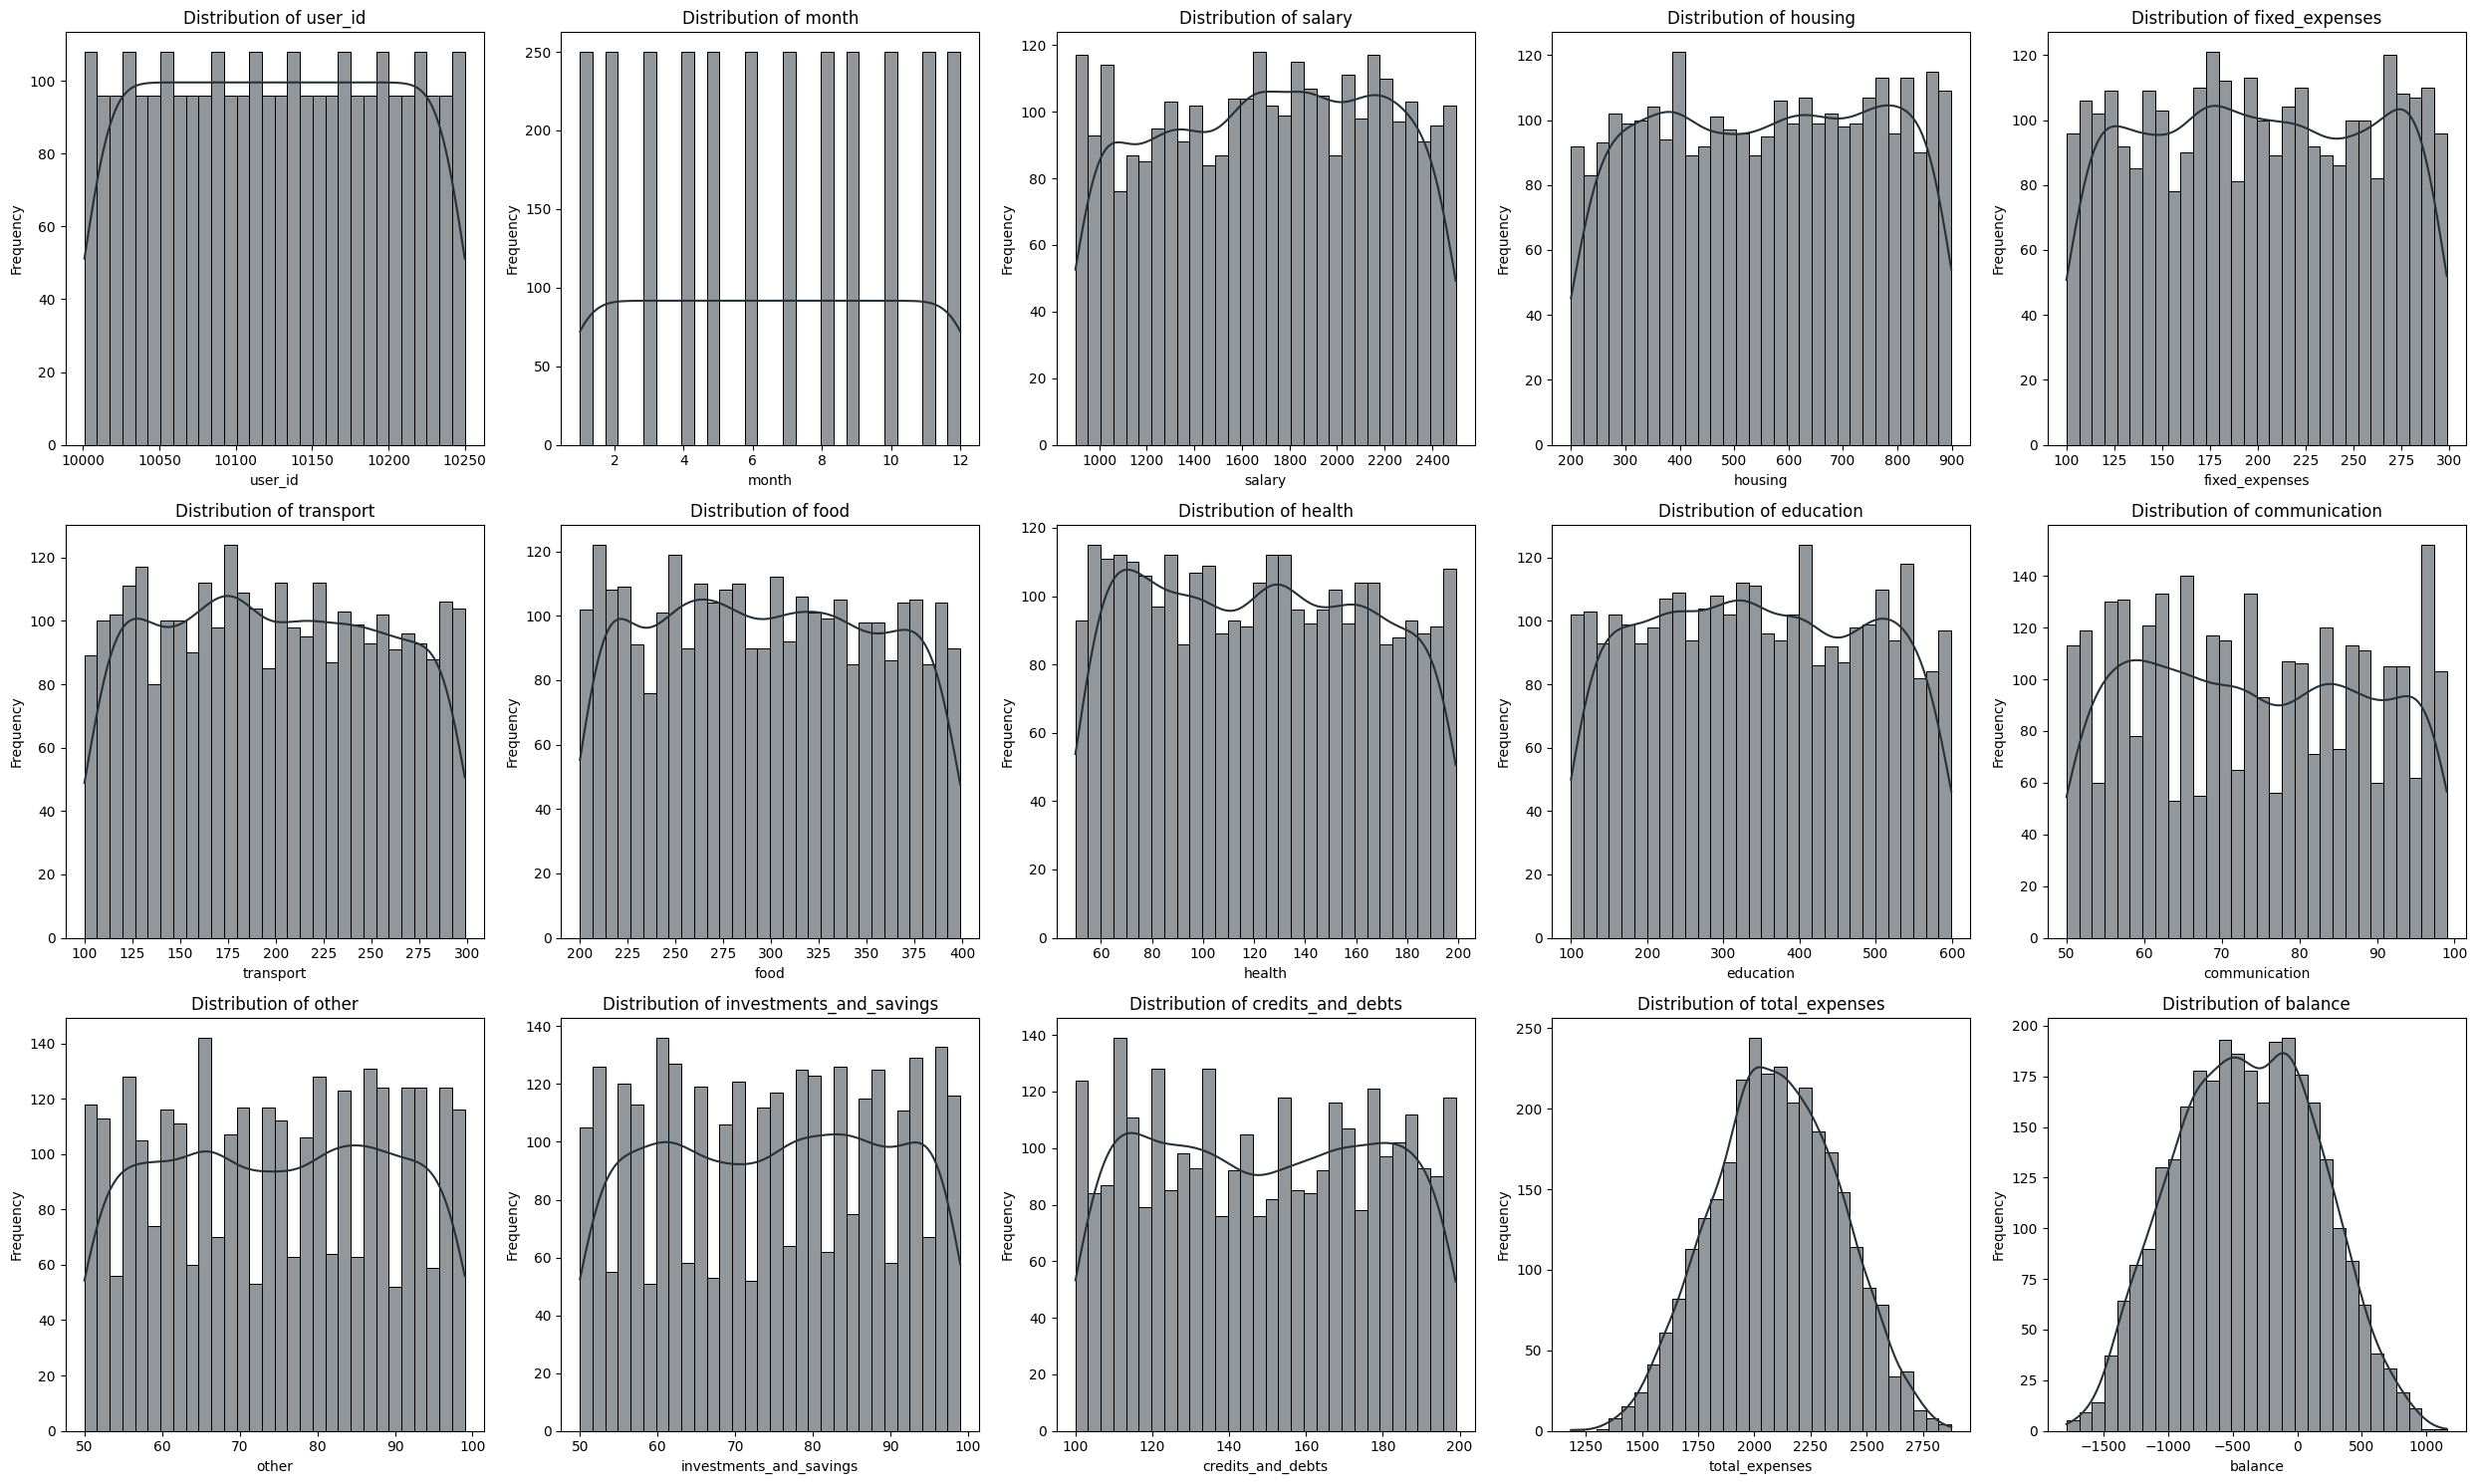

In [156]:
eda.visualize_data_distribution()

<h5 style="color: #000000;"> Data Exploration of Expenses per Category, balances (trend analysis)  </h5>

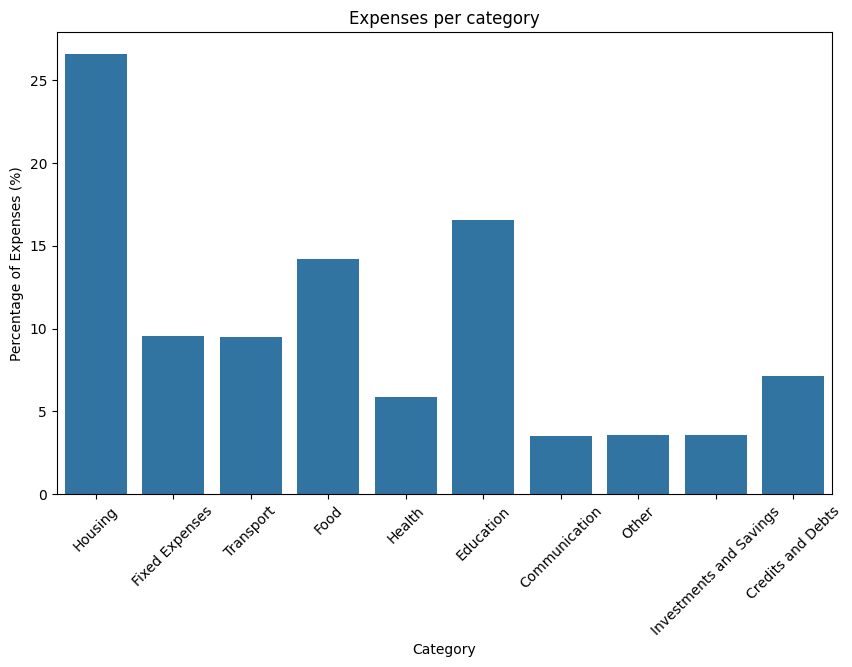

In [44]:
categories = ['Housing', 'Fixed Expenses', 'Transport', 'Food', 'Health', 'Education', 'Communication', 'Other', 'Investments and Savings', 'Credits and Debts']
category_totals = df[categories].sum()

total_expenses = category_totals.sum()
category_percentages = (category_totals / total_expenses) * 100  

plt.figure(figsize=(10,6))
sns.barplot(x=category_percentages.index, y=category_percentages.values)  
plt.title('Expenses per category')
plt.xticks(rotation=45)  
plt.xlabel('Category')
plt.ylabel('Percentage of Expenses (%)')
plt.show()

In [76]:
# Group by month and sum total expenses
df_monthly_expenses = df.groupby('month')['total_expenses'].sum().reset_index()
df_monthly_expenses['percentage_change'] = df_monthly_expenses['total_expenses'].pct_change() * 100
print(df_monthly_expenses)


    month  total_expenses  percentage_change
0       1          528789                NaN
1       2          529083           0.055599
2       3          529045          -0.007182
3       4          520372          -1.639369
4       5          520091          -0.054000
5       6          525619           1.062891
6       7          518729          -1.310835
7       8          529720           2.118833
8       9          518475          -2.122820
9      10          521637           0.609865
10     11          522392           0.144737
11     12          522907           0.098585


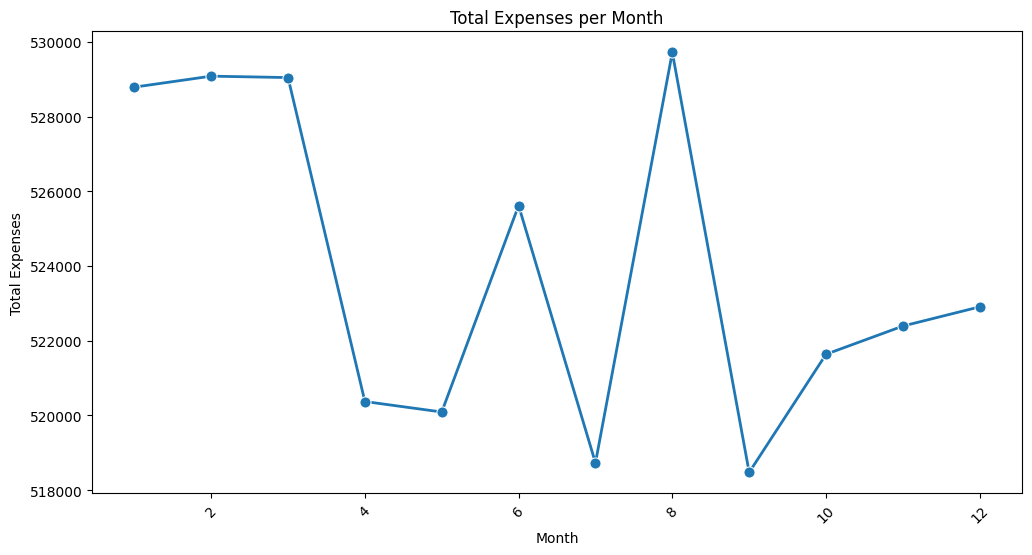

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create line plot for total expenses per month with large markers
plt.figure(figsize=(12,6))

# Use sns.lineplot to create the line plot with large markers
sns.lineplot(x='month', y='total_expenses', data=df_monthly_expenses, marker='o', markersize=8, linewidth=2)

# Add title and labels
plt.title('Total Expenses per Month')
plt.xlabel('Month')
plt.ylabel('Total Expenses')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [82]:
df

,user_id,name,month,salary,Housing,Fixed Expenses,Transport,Food,Health,Education,Communication,Other,Investments and Savings,Credits and Debts,total_expenses,balance
0,10001,Heidi David,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728
1,10002,John Hunt,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292
2,10003,Edward Russell,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797
3,10004,Patrick Fowler,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121
4,10005,Michael Silva,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10246,Samantha Martinez,12,1213,619,274,199,304,197,469,50,54,78,189,2433,-1220
2996,10247,Julie Joyce,12,1465,221,281,296,327,121,237,70,63,93,125,1834,-369
2997,10248,Juan Warren,12,1935,405,230,208,382,114,585,89,55,71,103,2242,-307
2998,10249,Jonathan Heath,12,1108,838,223,219,384,100,579,88,56,72,189,2748,-1640


In [90]:
monthly_balance = df.groupby('month')['balance'].sum().reset_index()
print(monthly_balance)


    month  balance
0       1   -84982
1       2  -107527
2       3   -87370
3       4  -101158
4       5  -102668
5       6   -97141
6       7   -81595
7       8   -96878
8       9  -100164
9      10   -85188
10     11   -99244
11     12  -114732


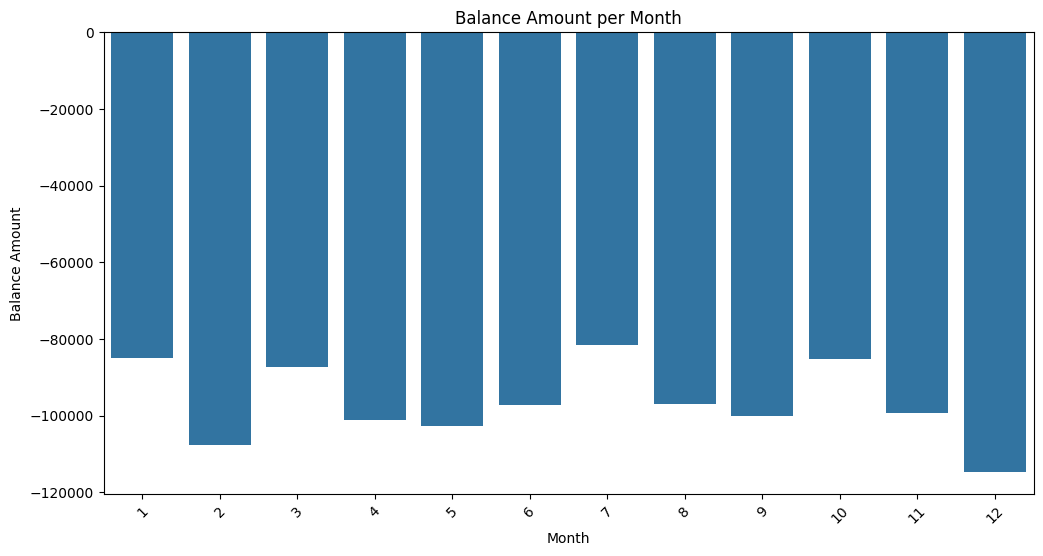

In [95]:
monthly_balance = df.groupby('month')['balance'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='month', y='balance', data=monthly_balance, errorbar=None)
plt.title('Balance Amount per Month')
plt.xlabel('Month')
plt.ylabel('Balance Amount')
plt.xticks(rotation=45)
plt.show()



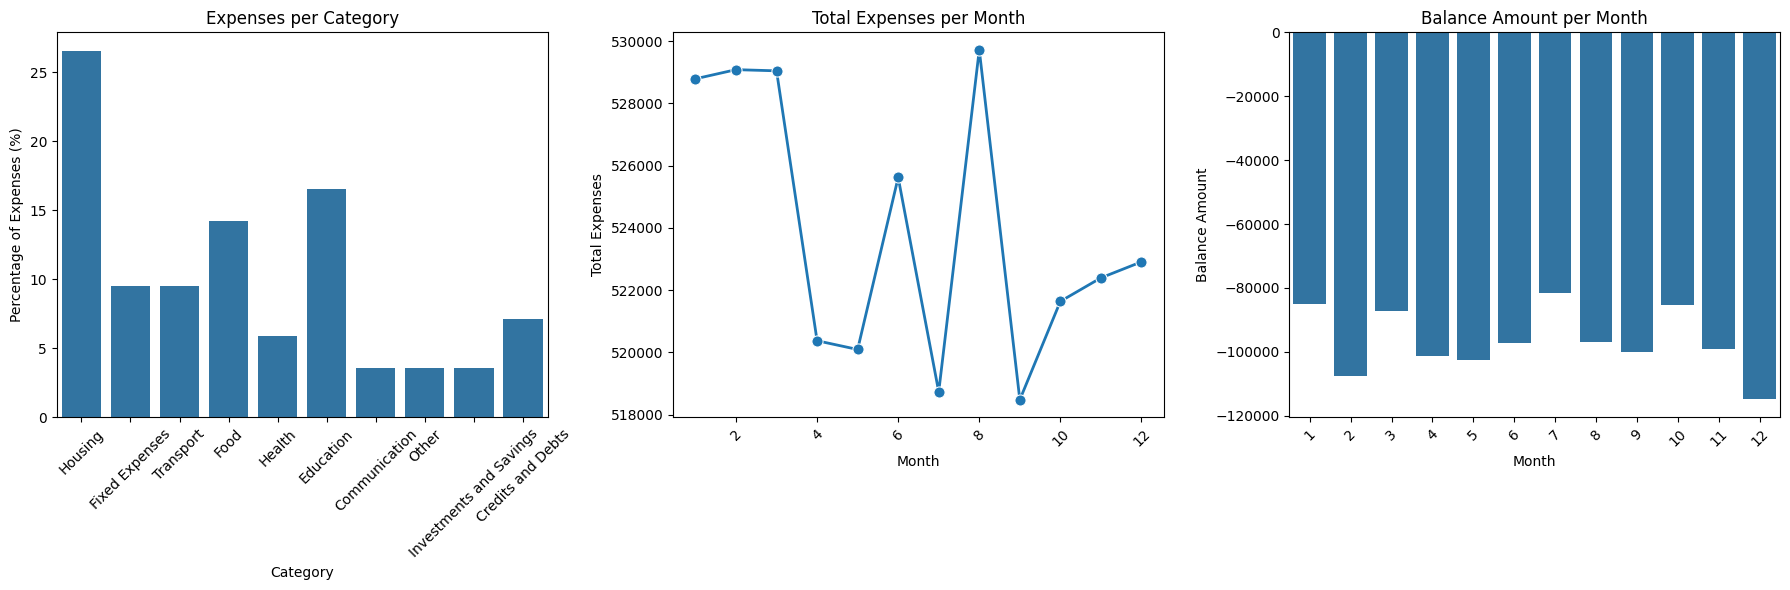

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

categories = ['Housing', 'Fixed Expenses', 'Transport', 'Food', 'Health', 'Education', 'Communication', 'Other', 'Investments and Savings', 'Credits and Debts']
category_totals = df[categories].sum()

total_expenses = category_totals.sum()
category_percentages = (category_totals / total_expenses) * 100

df_monthly_expenses = df.groupby('month')['total_expenses'].sum().reset_index()

monthly_balance = df.groupby('month')['balance'].sum().reset_index()
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the size as needed

# First subplot: Balance per month (bar plot)
sns.barplot(x=category_percentages.index, y=category_percentages.values, ax=axs[0])
axs[0].set_title('Expenses per Category')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Percentage of Expenses (%)')
axs[0].tick_params(axis='x', rotation=45)

# Second subplot: Balance per month (bar plot)
sns.lineplot(x='month', y='total_expenses', data=df_monthly_expenses, marker='o', markersize=8, linewidth=2, ax=axs[1])
axs[1].set_title('Total Expenses per Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Expenses')
axs[1].tick_params(axis='x', rotation=45)

# Third subplot: Balance per month (bar plot)
sns.barplot(x='month', y='balance', data=monthly_balance, ax=axs[2])
axs[2].set_title('Balance Amount per Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Balance Amount')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show all the plots
plt.show()


In [163]:
cleaned_data

,user_id,name,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance
0,10001,Heidi David,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728
1,10002,John Hunt,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292
2,10003,Edward Russell,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797
3,10004,Patrick Fowler,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121
4,10005,Michael Silva,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10246,Samantha Martinez,12,1213,619,274,199,304,197,469,50,54,78,189,2433,-1220
2996,10247,Julie Joyce,12,1465,221,281,296,327,121,237,70,63,93,125,1834,-369
2997,10248,Juan Warren,12,1935,405,230,208,382,114,585,89,55,71,103,2242,-307
2998,10249,Jonathan Heath,12,1108,838,223,219,384,100,579,88,56,72,189,2748,-1640


<h5 style="color: #000000;"> Function Optimized - Data Exploration of Expenses per Category, balances (trend analysis)  </h5>

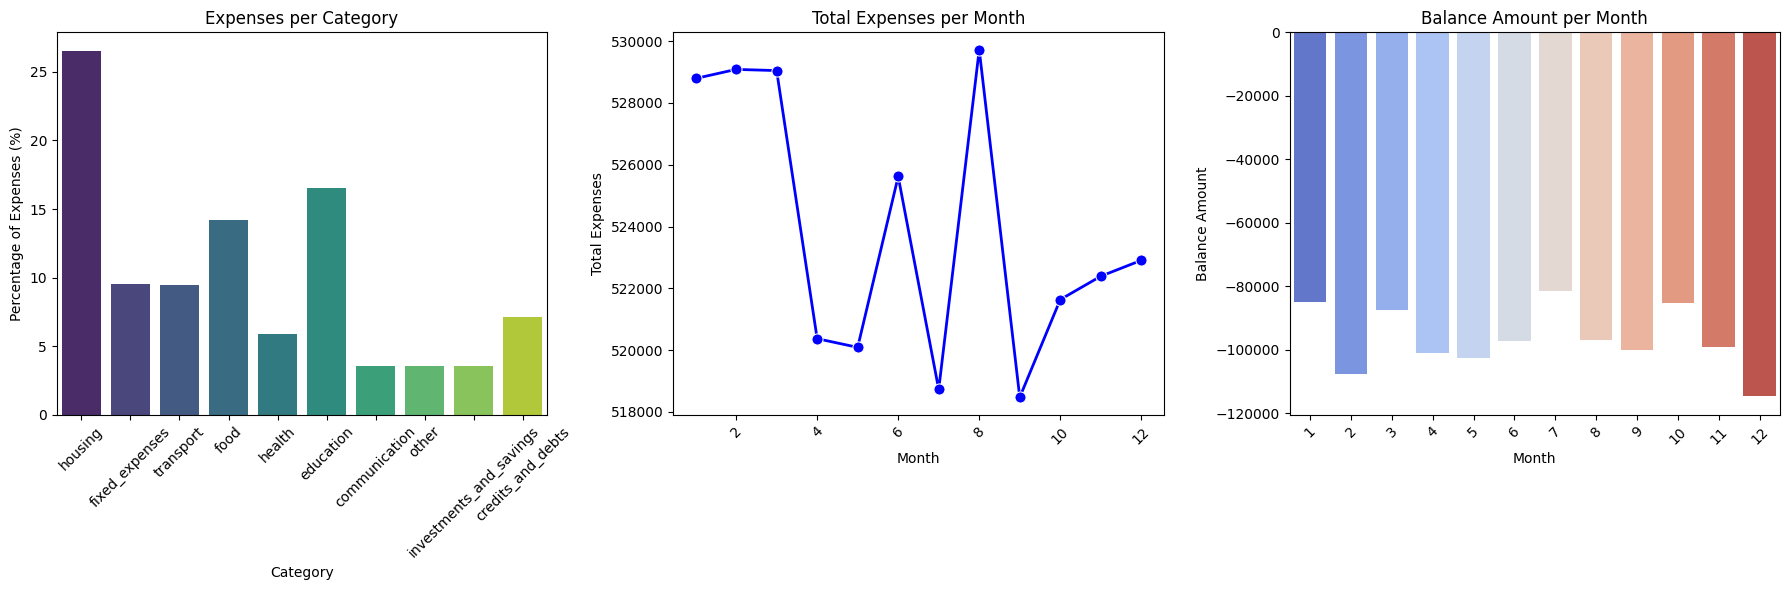

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_expenses_analysis(cleaned_data):
    categories = ['housing', 'fixed_expenses', 'transport', 'food', 'health', 'education', 
                'communication', 'other', 'investments_and_savings', 'credits_and_debts']
    
    # category and percentages
    category_totals = df[categories].sum()
    total_expenses = category_totals.sum()
    category_percentages = (category_totals / total_expenses) * 100
    
    # Expenese per month
    df_monthly_expenses = df.groupby('month')['total_expenses'].sum().reset_index()
    
    # balance
    monthly_balance = df.groupby('month')['balance'].sum().reset_index()
    
    # layout 3 graphs
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 3 subplots lado a lado
    
    # First plot : Expenses per category
    sns.barplot(x=category_percentages.index, y=category_percentages.values, ax=axs[0], palette="viridis")
    axs[0].set_title('Expenses per Category')
    axs[0].set_xlabel('Category')
    axs[0].set_ylabel('Percentage of Expenses (%)')
    axs[0].tick_params(axis='x', rotation=45)
    
    # Second plot: Expenese per month
    sns.lineplot(x='month', y='total_expenses', data=df_monthly_expenses, 
                marker='o', markersize=8, linewidth=2, ax=axs[1], color='b')
    axs[1].set_title('Total Expenses per Month')
    axs[1].set_xlabel('Month')
    axs[1].set_ylabel('Total Expenses')
    axs[1].tick_params(axis='x', rotation=45)
    
    # Third plot : Balance amount per month
    sns.barplot(x='month', y='balance', data=monthly_balance, ax=axs[2], palette="coolwarm")
    axs[2].set_title('Balance Amount per Month')
    axs[2].set_xlabel('Month')
    axs[2].set_ylabel('Balance Amount')
    axs[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    import warnings
    warnings.filterwarnings("ignore")

plot_expenses_analysis(cleaned_data)




In [169]:
cleaned_data

,user_id,name,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance
0,10001,Heidi David,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728
1,10002,John Hunt,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292
2,10003,Edward Russell,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797
3,10004,Patrick Fowler,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121
4,10005,Michael Silva,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10246,Samantha Martinez,12,1213,619,274,199,304,197,469,50,54,78,189,2433,-1220
2996,10247,Julie Joyce,12,1465,221,281,296,327,121,237,70,63,93,125,1834,-369
2997,10248,Juan Warren,12,1935,405,230,208,382,114,585,89,55,71,103,2242,-307
2998,10249,Jonathan Heath,12,1108,838,223,219,384,100,579,88,56,72,189,2748,-1640


<h4 style="color: #000000; font-weight: bold;"> Data Preprocessing and Feature Engineering</h4>

In [222]:
cleaned_data_ml = cleaned_data.copy()
cleaned_data_ml.drop(columns=['name'], inplace=True) # removing the columns name since we will have the userid as primary key
cleaned_data_ml

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10246,12,1213,619,274,199,304,197,469,50,54,78,189,2433,-1220
2996,10247,12,1465,221,281,296,327,121,237,70,63,93,125,1834,-369
2997,10248,12,1935,405,230,208,382,114,585,89,55,71,103,2242,-307
2998,10249,12,1108,838,223,219,384,100,579,88,56,72,189,2748,-1640


In [177]:
# variable that will be prediicted will be: 
# fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance


In [237]:
def feature_engineering(cleaned_data_ml):
    # 1. Create the 'high_season' variable to identify the high season
    cleaned_data_ml['high_season'] = cleaned_data_ml['month'].isin([12, 1, 2]).astype(int)
    
    # 2. Calculate the percentage change in salary
    cleaned_data_ml['salary_pct_change'] = cleaned_data_ml.groupby('user_id')['salary'].pct_change().fillna(0)
    
    # 3. Calculate the salary relative to the global average
    average_salary = cleaned_data_ml['salary'].mean()
    cleaned_data_ml['salary_relative'] = cleaned_data_ml['salary'] / average_salary
    
    # 4. Calculate the rolling average of salary over the last 3 months
    cleaned_data_ml['salary_rolling_avg'] = cleaned_data_ml.groupby('user_id')['salary'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
    
    # 5. Classify salary into categories (Low, Medium, High, Very High)
    bins = [0, 1200, 1800, 2300, np.inf]
    labels = [1, 2, 3, 4] 
    # Create the salary_category column and cast it to integer
    cleaned_data_ml['salary_category'] = pd.cut(cleaned_data_ml['salary'], bins=bins, labels=labels).astype(int)

    # 6. Calculate the salary deviation from the global average
    cleaned_data_ml['salary_deviation'] = cleaned_data_ml['salary'] - average_salary

    # 8. Calculate the difference between the salary and the average salary for that month
    salary_by_month = cleaned_data_ml.groupby('month')['salary'].transform('mean')
    cleaned_data_ml['salary_vs_month_avg'] = cleaned_data_ml['salary'] - salary_by_month

    # 9. Round all numeric variables to 2 decimal places
    float_columns = cleaned_data_ml.select_dtypes(include=['float64']).columns
    cleaned_data_ml[float_columns] = cleaned_data_ml[float_columns].round(2)
    
    return cleaned_data_ml
cleaned_data_ml = feature_engineering(cleaned_data_ml)
cleaned_data_ml.head()

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,...,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg
0,10001,1,2026,832,283,258,333,135,508,97,...,198,2754,-728,1,0.0,1.19,2026.0,3,316.6,250.77
1,10002,1,2359,617,195,168,360,189,173,80,...,109,2067,292,1,0.0,1.38,2359.0,4,649.6,583.77
2,10003,1,1760,636,260,203,382,120,559,86,...,160,2557,-797,1,0.0,1.03,1760.0,2,50.6,-15.23
3,10004,1,2194,576,272,260,218,95,524,93,...,107,2315,-121,1,0.0,1.28,2194.0,3,484.6,418.77
4,10005,1,2030,219,263,299,326,96,298,77,...,147,1849,181,1,0.0,1.19,2030.0,3,320.6,254.77


<h5 style="color: #000000;"> Function Optimized - Correlation Matrix  </h5>

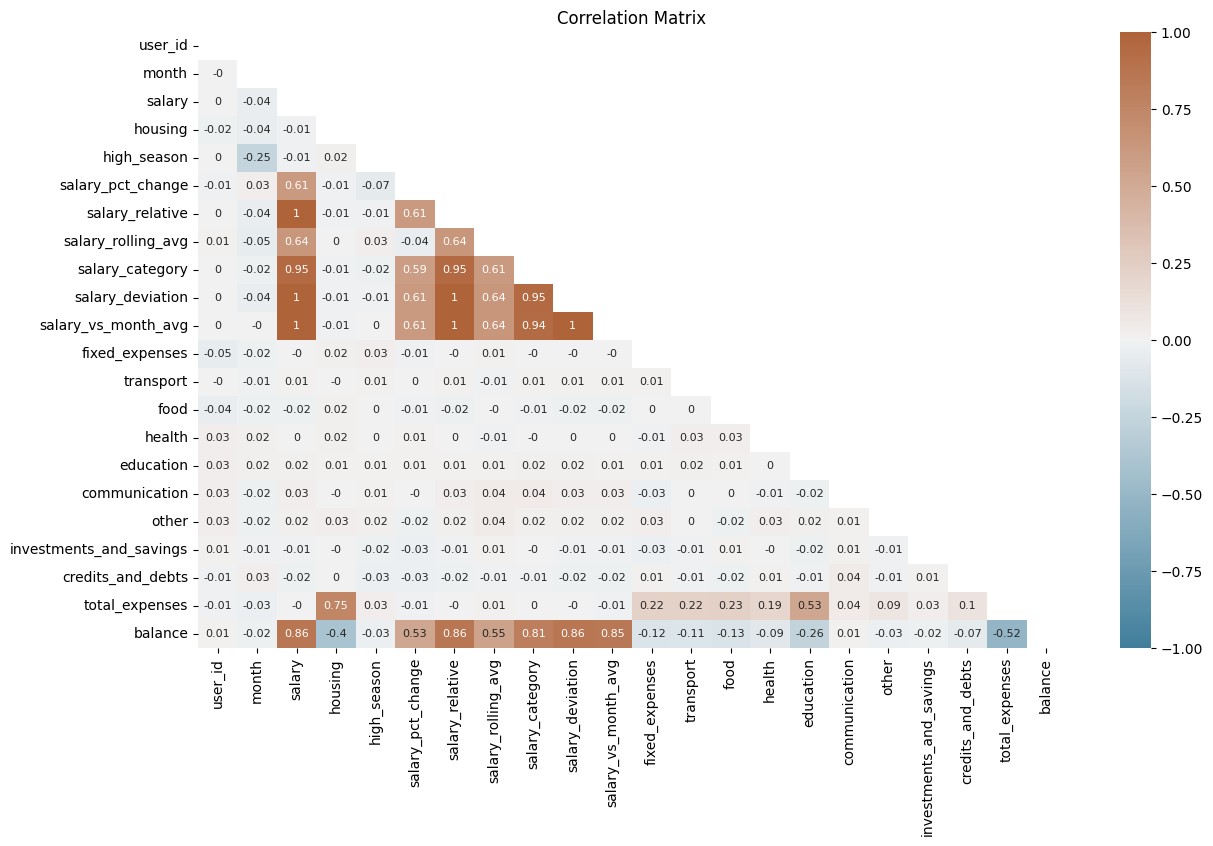

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

class CorrelationHeatmap:
    def __init__(self, cleaned_data_ml):
        self.cleaned_data_ml = cleaned_data_ml
        self.move_columns_to_end()  # Chama a função para mover as colunas para o final
        
    target_columns = ['fixed_expenses', 'transport', 'food', 'health', 'education', 
                    'communication', 'other', 'investments_and_savings', 
                    'credits_and_debts', 'total_expenses', 'balance']
    
    def move_columns_to_end(self):

        cols = self.cleaned_data_ml.columns.tolist()  
        cols = [col for col in cols if col not in self.target_columns] + self.target_columns
        self.cleaned_data_ml = self.cleaned_data_ml[cols]
    
    def plot_correlation_heatmap(self):
        # Calcular a matriz de correlação
        corr = self.cleaned_data_ml.corr().round(2)
        
        # Aplicar a máscara para exibir apenas a parte superior da matriz de correlação
        mask = np.triu(np.ones_like(corr, dtype=bool))

        # Criar o gráfico de heatmap com as personalizações
        plt.figure(figsize=(14, 8))
        sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(230, 30, as_cmap=True),
                    vmin=-1, vmax=1, center=0, annot_kws={"fontsize": 8})
        plt.title("Correlation Matrix")
        plt.show()

# Exemplo de como usar:
# Suponha que 'cleaned_data_ml' seja o seu DataFrame
correlation_heatmap = CorrelationHeatmap(cleaned_data_ml)
correlation_heatmap.plot_correlation_heatmap()


<h5 style="color: #000000;"> Checking Multicolinearity  </h5>

In [247]:
class MulticollinearityAnalysis:
    def __init__(self, cleaned_data_ml):
        self.cleaned_data_ml = cleaned_data_ml

    def detect_multicollinearity(self):
        # Select numerical columns
        numeric_data = self.cleaned_data_ml.select_dtypes(include=[np.int32, np.int64, np.float64])
        
        # Calculate the correlation matrix
        corr_matrix = numeric_data.corr()
        
        # Find pairs of variables with correlation > 0.7 (and not equal to 1)
        high_corr = corr_matrix[(corr_matrix.abs() > 0.7) & (corr_matrix != 1)]
        
        # Stack the matrix to get pairs
        high_corr_pairs = high_corr.stack()
        
        if not high_corr_pairs.empty:
            print("Pairs of variables with high correlation (> 0.7):")
            print(high_corr_pairs)
        else:
            print("There are no pairs of variables with correlation > 0.7.")
        
        return self.cleaned_data_ml

# Create an instance of the class
multicollinearity_analyzer = MulticollinearityAnalysis(cleaned_data_ml)

# Run the multicollinearity detection method
multicollinearity_analyzer.detect_multicollinearity()


Pairs of variables with high correlation (> 0.7):
salary               balance                0.856263
                     salary_relative        0.999942
                     salary_category        0.947332
                     salary_deviation       1.000000
                     salary_vs_month_avg    0.995727
housing              total_expenses         0.745795
total_expenses       housing                0.745795
balance              salary                 0.856263
                     salary_relative        0.856272
                     salary_category        0.807700
                     salary_deviation       0.856263
                     salary_vs_month_avg    0.853852
salary_relative      salary                 0.999942
                     balance                0.856272
                     salary_category        0.947314
                     salary_deviation       0.999942
                     salary_vs_month_avg    0.995663
salary_category      salary                 0.947

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,...,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg
0,10001,1,2026,832,283,258,333,135,508,97,...,198,2754,-728,1,0.00,1.19,2026.00,3,316.6,250.77
1,10002,1,2359,617,195,168,360,189,173,80,...,109,2067,292,1,0.00,1.38,2359.00,4,649.6,583.77
2,10003,1,1760,636,260,203,382,120,559,86,...,160,2557,-797,1,0.00,1.03,1760.00,2,50.6,-15.23
3,10004,1,2194,576,272,260,218,95,524,93,...,107,2315,-121,1,0.00,1.28,2194.00,3,484.6,418.77
4,10005,1,2030,219,263,299,326,96,298,77,...,147,1849,181,1,0.00,1.19,2030.00,3,320.6,254.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10246,12,1213,619,274,199,304,197,469,50,...,189,2433,-1220,1,-0.42,0.71,1713.00,2,-496.4,-419.70
2996,10247,12,1465,221,281,296,327,121,237,70,...,125,1834,-369,1,0.14,0.86,1473.00,2,-244.4,-167.70
2997,10248,12,1935,405,230,208,382,114,585,89,...,103,2242,-307,1,-0.23,1.13,2225.00,3,225.6,302.30
2998,10249,12,1108,838,223,219,384,100,579,88,...,189,2748,-1640,1,-0.15,0.65,1191.33,1,-601.4,-524.70


<h5 style="color: black; font-weight: bold;">Data Modeling </h5>

In [375]:
cleaned_data_ml_processed = cleaned_data_ml.copy()
# cleaned_data_ml_processed.drop(columns=['user_id'], inplace=True) 
cleaned_data_ml_processed.dtypes

user_id                      int64
month                        int64
salary                       int64
housing                      int64
fixed_expenses               int64
transport                    int64
food                         int64
health                       int64
education                    int64
communication                int64
other                        int64
investments_and_savings      int64
credits_and_debts            int64
total_expenses               int64
balance                      int64
high_season                  int64
salary_pct_change          float64
salary_relative            float64
salary_rolling_avg         float64
salary_category              int64
salary_deviation           float64
salary_vs_month_avg        float64
dtype: object

<h3 style="color: #000000;"> Unsupervised Learning with K-means </h3>

In [378]:
# columns that the model will use to perform the clusters
target_columns = ['housing','fixed_expenses', 'transport', 'food', 'health', 'education', 
                    'communication', 'other', 'investments_and_savings', 
                    'credits_and_debts', 'total_expenses', 'balance']

X_clustering = cleaned_data_ml_processed[target_columns]
kmeans = KMeans(n_clusters=3, random_state=42) # 3 cluster as essencial, semi-essencial and others (cluster started at 0)
cleaned_data_ml_processed['cluster'] = kmeans.fit_predict(X_clustering)
#X_clustering.head()
cleaned_data_ml_processed.head()
cleaned_data_ml_processed['cluster'] = cleaned_data_ml_processed['cluster'].astype(int)
cluster_means = cleaned_data_ml_processed[target_columns + ['cluster']].groupby('cluster').mean().round(2)
cluster_means

# Insights: Cluster_3, have a positive balance than the previous cluster (due to the housing discrepancy????)

,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance
cluster,,,,,,,,,,,,
0,563.14,198.21,197.64,296.83,123.76,350.65,74.56,74.61,74.42,148.21,2102.02,-377.45
1,677.59,210.55,206.80,308.56,127.09,395.48,73.81,75.47,75.56,152.84,2303.75,-1025.61
2,423.04,191.63,192.09,287.94,116.90,291.92,73.86,73.89,74.79,147.04,1873.09,254.19


In [380]:
o_cleaned_data_ml_processed = cleaned_data_ml_processed.copy()
o_cleaned_data_ml_processed.head()

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg,cluster
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.0,1.19,2026.0,3,316.6,250.77,1
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292,1,0.0,1.38,2359.0,4,649.6,583.77,2
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797,1,0.0,1.03,1760.0,2,50.6,-15.23,1
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121,1,0.0,1.28,2194.0,3,484.6,418.77,0
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181,1,0.0,1.19,2030.0,3,320.6,254.77,2


In [609]:
cluster_mapping = {
    0: 'Essential',       
    1: 'Semi-Essential',   
    2: 'Extra'             
}

cleaned_data_ml_processed['cluster_category'] = cleaned_data_ml_processed['cluster'].map(cluster_mapping)
cleaned_data_ml_processed.head(5)

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg,cluster,cluster_category
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.0,1.19,2026.0,3,316.6,250.77,1,Semi-Essential
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292,1,0.0,1.38,2359.0,4,649.6,583.77,2,Extra
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797,1,0.0,1.03,1760.0,2,50.6,-15.23,1,Semi-Essential
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121,1,0.0,1.28,2194.0,3,484.6,418.77,0,Essential
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181,1,0.0,1.19,2030.0,3,320.6,254.77,2,Extra


In [616]:
anomaly_detection = cleaned_data_ml_processed.copy()

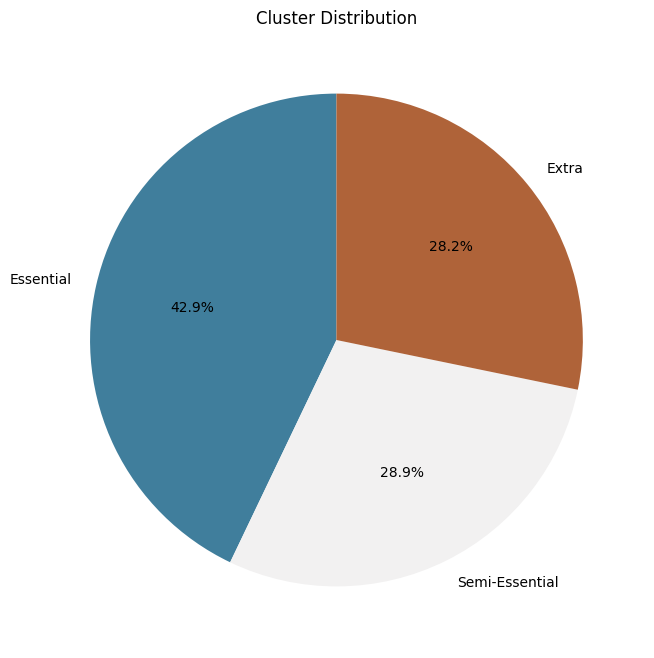

In [355]:
# Count the values in the 'cluster_category' column
cluster_counts = cleaned_data_ml_processed['cluster_category'].value_counts()

# Generate the diverging color palette
colors = sns.diverging_palette(230, 30, as_cmap=False, n=3)  # n=3 to create 3 distinct colors

# Create the pie chart
plt.figure(figsize=(8, 8))
cluster_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90, legend=False)

# Customize the chart
plt.title('Cluster Distribution')
plt.ylabel('')  # Removes the Y-axis label for a cleaner look

# Display the chart
plt.show()


# User Expense Classification Report by Cluster

In [383]:
import pandas as pd

# Função para gerar o relatório para um único usuário e mês
def generate_user_report(user_id, month, user_data, cluster_mapping, target_columns, centroid_df):
    # Filtrar os dados do usuário e o mês
    user_data_filtered = user_data[(user_data['user_id'] == user_id) & (user_data['month'] == month)]
    
    if user_data_filtered.empty:
        return f"User {user_id} not found for Month {month}."
    
    # Obter o cluster do usuário e o mês
    user_cluster = user_data_filtered['cluster'].values[0]
    user_cluster_category = cluster_mapping[user_cluster]
    user_expenses = user_data_filtered[target_columns].values[0]
    
    # Obter as centroides do cluster do usuário
    cluster_centroid = centroid_df.loc[centroid_df['cluster_category'] == user_cluster_category, target_columns].values[0]
    
    # Calcular a diferença entre as despesas do usuário e a média do cluster
    differences = user_expenses - cluster_centroid
    
    # Gerar o relatório com o mês incluído
    report = f"User {user_id} (Month {month}) belongs to the '{user_cluster_category}' cluster.\n"
    report += f"The user's expenses are more aligned with the following categories:\n"
    
    # Adicionar cada despesa ao relatório
    for expense, diff in zip(target_columns, differences):
        if diff > 0:
            report += f"{expense}: Essential\n"
        elif diff < 0:
            report += f"{expense}: Less Important\n"
        else:
            report += f"{expense}: Neutral\n"
    
    return report


def select_user_and_month():
    # asking the user to select the month and the user
    user_id = int(input("Enter the user_id: "))
    month = int(input("Enter the month (1 for January, 2 for February, etc.): "))
    
    return user_id, month


def generate_report():
    #  Selecting the user and the month
    user_id, month = select_user_and_month()

    report = generate_user_report(user_id, month, cleaned_data_ml_processed, cluster_mapping, target_columns, centroid_df)
    print(report)

generate_report()


User 10003 (Month 5) belongs to the 'Semi-Essential' cluster.
The user's expenses are more aligned with the following categories:
housing: Essential
fixed_expenses: Essential
transport: Less Important
food: Less Important
health: Essential
education: Less Important
communication: Essential
other: Essential
investments_and_savings: Essential
credits_and_debts: Less Important
total_expenses: Essential
balance: Essential



# Test - Makes sense to show this? No, no??

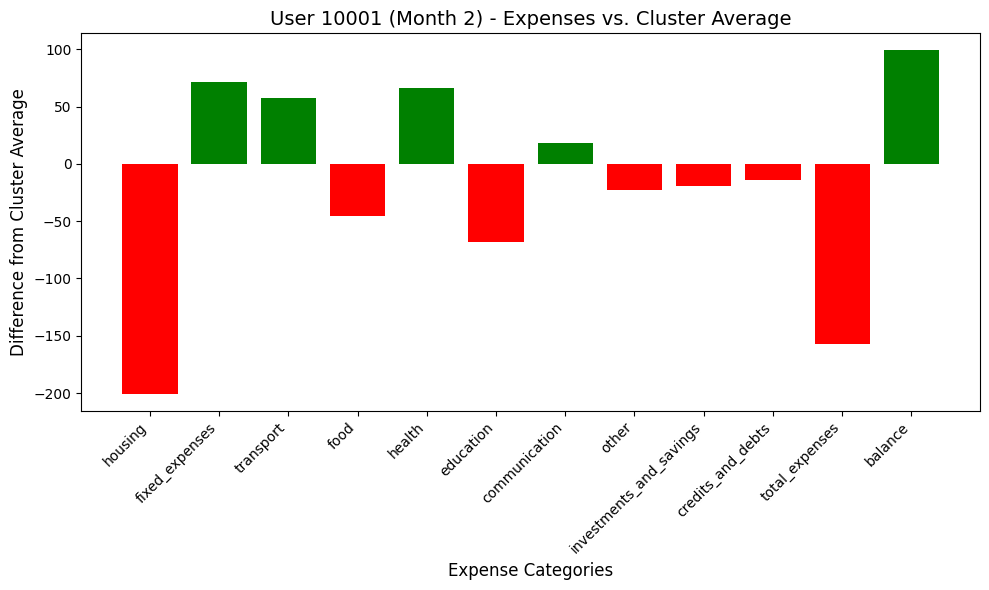

User 10001 (Month 2) belongs to the 'Essential' cluster.
The user's expenses are more aligned with the following categories:
housing: Less Important
fixed_expenses: Essential
transport: Essential
food: Less Important
health: Essential
education: Less Important
communication: Essential
other: Less Important
investments_and_savings: Less Important
credits_and_debts: Less Important
total_expenses: Less Important
balance: Essential



In [384]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para gerar o relatório e o gráfico para um único usuário e mês
def generate_user_report(user_id, month, user_data, cluster_mapping, target_columns, centroid_df):
    # Filtrar os dados do usuário e o mês
    user_data_filtered = user_data[(user_data['user_id'] == user_id) & (user_data['month'] == month)]
    
    if user_data_filtered.empty:
        return f"User {user_id} not found for Month {month}."
    
    # Obter o cluster do usuário e o mês
    user_cluster = user_data_filtered['cluster'].values[0]
    user_cluster_category = cluster_mapping[user_cluster]
    user_expenses = user_data_filtered[target_columns].values[0]
    
    # Obter as centroides do cluster do usuário
    cluster_centroid = centroid_df.loc[centroid_df['cluster_category'] == user_cluster_category, target_columns].values[0]
    
    # Calcular a diferença entre as despesas do usuário e a média do cluster
    differences = user_expenses - cluster_centroid
    
    # Gerar o relatório com o mês incluído
    report = f"User {user_id} (Month {month}) belongs to the '{user_cluster_category}' cluster.\n"
    report += f"The user's expenses are more aligned with the following categories:\n"
    
    # Adicionar cada despesa ao relatório
    for expense, diff in zip(target_columns, differences):
        if diff > 0:
            report += f"{expense}: Essential\n"
        elif diff < 0:
            report += f"{expense}: Less Important\n"
        else:
            report += f"{expense}: Neutral\n"
    
    # Gerar o gráfico
    plot_expenses_vs_cluster(user_id, month, target_columns, differences)
    
    return report

# Função para plotar o gráfico das diferenças
def plot_expenses_vs_cluster(user_id, month, target_columns, differences):
    # Criar um gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(target_columns, differences, color=['green' if diff > 0 else ('red' if diff < 0 else 'gray') for diff in differences])
    
    # Adicionar título e rótulos
    plt.title(f"User {user_id} (Month {month}) - Expenses vs. Cluster Average", fontsize=14)
    plt.xlabel('Expense Categories', fontsize=12)
    plt.ylabel('Difference from Cluster Average', fontsize=12)
    
    # Exibir o gráfico
    plt.xticks(rotation=45, ha='right')  # Para girar os nomes das categorias de despesas
    plt.tight_layout()
    plt.show()

# Função para selecionar o usuário e o mês
def select_user_and_month():
    # Pedir ao usuário para selecionar o mês e o usuário
    user_id = int(input("Enter the user_id: "))
    month = int(input("Enter the month (1 for January, 2 for February, etc.): "))
    
    return user_id, month

# Função principal para gerar o relatório e o gráfico
def generate_report():
    # Selecionando o usuário e o mês
    user_id, month = select_user_and_month()

    # Gerar o relatório e o gráfico para o usuário selecionado
    report = generate_user_report(user_id, month, cleaned_data_ml_processed, cluster_mapping, target_columns, centroid_df)
    print(report)

# Gerar o relatório e o gráfico
generate_report()


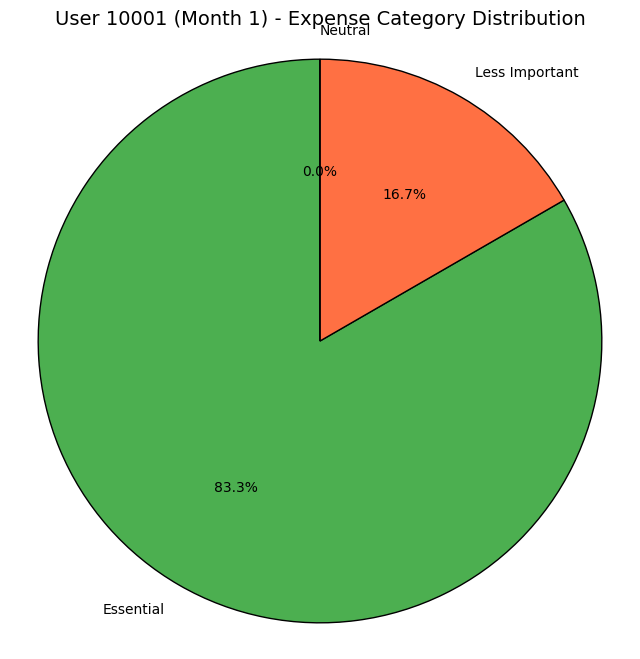

User 10001 (Month 1) belongs to the 'Semi-Essential' cluster.
The user's expenses are more aligned with the following categories:
housing: Essential
fixed_expenses: Essential
transport: Essential
food: Essential
health: Essential
education: Essential
communication: Essential
other: Less Important
investments_and_savings: Less Important
credits_and_debts: Essential
total_expenses: Essential
balance: Essential



In [389]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para gerar o relatório e o gráfico para um único usuário e mês
def generate_user_report(user_id, month, user_data, cluster_mapping, target_columns, centroid_df):
    # Filtrar os dados do usuário e o mês
    user_data_filtered = user_data[(user_data['user_id'] == user_id) & (user_data['month'] == month)]
    
    if user_data_filtered.empty:
        return f"User {user_id} not found for Month {month}."
    
    # Obter o cluster do usuário e o mês
    user_cluster = user_data_filtered['cluster'].values[0]
    user_cluster_category = cluster_mapping[user_cluster]
    user_expenses = user_data_filtered[target_columns].values[0]
    
    # Obter as centroides do cluster do usuário
    cluster_centroid = centroid_df.loc[centroid_df['cluster_category'] == user_cluster_category, target_columns].values[0]
    
    # Calcular a diferença entre as despesas do usuário e a média do cluster
    differences = user_expenses - cluster_centroid
    
    # Gerar o relatório com o mês incluído
    report = f"User {user_id} (Month {month}) belongs to the '{user_cluster_category}' cluster.\n"
    report += f"The user's expenses are more aligned with the following categories:\n"
    
    # Adicionar cada despesa ao relatório
    for expense, diff in zip(target_columns, differences):
        if diff > 0:
            report += f"{expense}: Essential\n"
        elif diff < 0:
            report += f"{expense}: Less Important\n"
        else:
            report += f"{expense}: Neutral\n"
    
    # Gerar o gráfico de pizza
    plot_expenses_pie_chart(user_id, month, target_columns, differences)
    
    return report

# Função para plotar o gráfico de pizza
def plot_expenses_pie_chart(user_id, month, target_columns, differences):
    # Definir as categorias de despesa
    categories = ['Essential', 'Less Important', 'Neutral']
    
    # Contar as ocorrências de cada categoria (Essencial, Menos Importante, Neutro)
    essential_count = sum(1 for diff in differences if diff > 0)
    less_important_count = sum(1 for diff in differences if diff < 0)
    neutral_count = sum(1 for diff in differences if diff == 0)
    
    # Definir os tamanhos das fatias e os rótulos
    sizes = [essential_count, less_important_count, neutral_count]
    labels = categories
    colors = ['#4CAF50', '#FF7043', '#BDBDBD']  # Verde para essencial, Vermelho para menos importante, Cinza para neutro
    
    # graph
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(f"User {user_id} (Month {month}) - Expense Category Distribution", fontsize=14)
    plt.axis('equal')  # Para garantir que o gráfico seja um círculo perfeito
    plt.show()

# Função para selecionar o usuário e o mês
def select_user_and_month():
    # Pedir ao usuário para selecionar o mês e o usuário
    user_id = int(input("Enter the user_id: "))
    month = int(input("Enter the month (1 for January, 2 for February, etc.): "))
    
    return user_id, month

# Função principal para gerar o relatório e o gráfico
def generate_report():
    # Selecionando o usuário e o mês
    user_id, month = select_user_and_month()

    # Gerar o relatório e o gráfico para o usuário selecionado
    report = generate_user_report(user_id, month, cleaned_data_ml_processed, cluster_mapping, target_columns, centroid_df)
    print(report)

# Gerar o relatório e o gráfico
generate_report()


In [390]:
from sklearn.metrics import silhouette_score

# Calcular o Silhouette Score
silhouette_avg = silhouette_score(X_clustering, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.2919426340193876


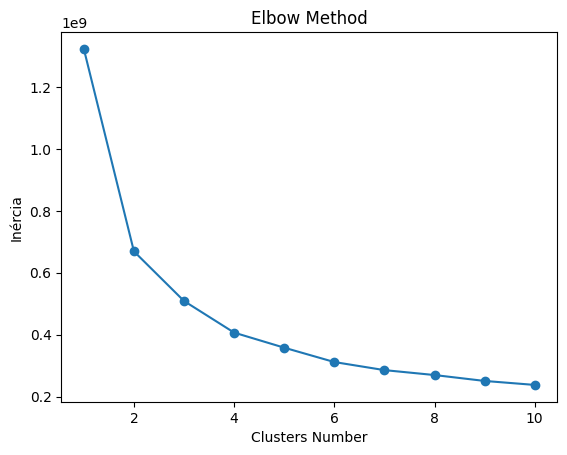

In [393]:
import matplotlib.pyplot as plt

# Testar com diferentes números de clusters (por exemplo, de 1 a 10)
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia_values.append(kmeans.inertia_)

# Plotar o gráfico de inércia para encontrar o cotovelo
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters Number")
plt.ylabel("Inércia")
plt.show()


In [395]:
from sklearn.metrics import davies_bouldin_score

# Calcular o Davies-Bouldin Index
db_score = davies_bouldin_score(X_clustering, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 1.235022617389728


In [394]:
from sklearn.metrics import calinski_harabasz_score

# Calcular o Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_clustering, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_score}")


Calinski-Harabasz Index: 1515.9468831008458


In [ ]:
from kneed import KneeLocator
kn = KneeLocator(range_of_clusters, inertias, curve='convex', direction='decreasing')
optimal_clusters = kn.knee
print(f"Knee method optimal clusters: {optimal_clusters}")


Knee method optimal clusters: 3


<h3 style="color: #000000;"> Anomaly Detection with Isolation Forest </h3>

In [639]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=100,          # Número de árvores
    contamination=0.1,         # 10% de anomalias esperadas
    max_samples='auto',        # Usa o máximo de amostras possível (mesmo número de amostras que X)
    random_state=42,           # Fixando a semente para resultados consistentes
    max_features=1.0,          # Usando todas as características
    bootstrap=False,           # Não usa amostragem com reposição
    warm_start=False           # Não atualiza as árvores após o modelo estar treinado
)

iso_forest.fit(anomaly_detection)
# Predizendo as anomalias (-1 para anômalo, 1 para normal)
anomaly_detection['anomaly'] = iso_forest.predict(anomaly_detection)

# Opcional: Analisando a quantidade de anomalias detectadas
print(f"Total de anomalias detectadas: {sum(anomaly_detection['anomaly'] == -1)}")
print(f"Total de pontos normais: {sum(anomaly_detection['anomaly'] == 1)}")

anomaly_detection.head()


Total de anomalias detectadas: 300
Total de pontos normais: 2700


,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg,cluster,anomaly
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.0,1.19,2026.0,3,316.6,250.77,1,-1
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292,1,0.0,1.38,2359.0,4,649.6,583.77,2,-1
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797,1,0.0,1.03,1760.0,2,50.6,-15.23,1,1
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121,1,0.0,1.28,2194.0,3,484.6,418.77,0,-1
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181,1,0.0,1.19,2030.0,3,320.6,254.77,2,1


In [643]:
# Testing
user_data = anomaly_detection[anomaly_detection['user_id'] == 10001]
user_data


,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg,cluster,anomaly
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.00,1.19,2026.00,3,316.6,250.77,1,-1
250,10001,2,1666,363,270,255,251,190,282,93,52,55,134,1945,-279,1,-0.18,0.97,1846.00,2,-43.4,-20.22,0,-1
500,10001,3,2112,579,125,202,216,75,587,53,90,89,103,2119,-7,0,0.27,1.24,1934.67,3,402.6,345.30,0,1
750,10001,4,946,812,291,182,289,185,533,88,97,85,171,2733,-1787,0,-0.55,0.55,1574.67,1,-763.4,-730.86,1,-1
1000,10001,5,1926,230,178,229,350,61,301,67,55,50,123,1644,282,0,1.04,1.13,1661.33,3,216.6,256.31,2,1
1250,10001,6,2383,655,149,221,329,150,228,65,71,71,167,2106,277,0,0.24,1.39,1751.67,4,673.6,669.09,2,1
1500,10001,7,2324,764,135,174,275,156,211,84,66,74,112,2051,273,0,-0.02,1.36,2211.00,4,614.6,575.46,2,1
1750,10001,8,961,476,272,170,391,139,292,84,93,68,124,2109,-1148,0,-0.59,0.56,1889.33,1,-748.4,-770.37,1,1
2000,10001,9,971,438,247,155,378,104,348,53,73,93,132,2021,-1050,0,0.01,0.57,1418.67,1,-738.4,-702.24,1,1
2250,10001,10,2174,437,240,125,375,192,462,82,61,66,170,2210,-36,0,1.24,1.27,1368.67,3,464.6,428.20,0,-1


<h3 style="color: #000000;"> Supervised Learning with Random Forest </h3>

In [576]:
# o_cleaned_data_ml_processed.drop(columns=['cluster'], inplace=True)
o_cleaned_data_ml_processed.head()


,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.0,1.19,2026.0,3,316.6,250.77
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292,1,0.0,1.38,2359.0,4,649.6,583.77
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797,1,0.0,1.03,1760.0,2,50.6,-15.23
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121,1,0.0,1.28,2194.0,3,484.6,418.77
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181,1,0.0,1.19,2030.0,3,320.6,254.77


In [577]:
data_ml_processed = o_cleaned_data_ml_processed.copy()

In [545]:
#multicollinearity_analyzer2 = MulticollinearityAnalysis(o_cleaned_data_ml_processed)
# multicollinearity_analyzer2.detect_multicollinearity().head()

In [578]:
data_ml_processed.head()

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.0,1.19,2026.0,3,316.6,250.77
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292,1,0.0,1.38,2359.0,4,649.6,583.77
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797,1,0.0,1.03,1760.0,2,50.6,-15.23
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121,1,0.0,1.28,2194.0,3,484.6,418.77
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181,1,0.0,1.19,2030.0,3,320.6,254.77


<h3 style="color: #000000;"> Train test Split</h3>

In [680]:
# data_ml_processed = data_ml_processed.drop(columns=['salary_relative', 'salary_deviation', 'salary_vs_month_avg', 'salary_category'])
data_ml_processed.head()

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_rolling_avg
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.0,2026.0
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292,1,0.0,2359.0
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797,1,0.0,1760.0
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121,1,0.0,2194.0
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181,1,0.0,2030.0


In [580]:
multicollinearity_analyzer2 = MulticollinearityAnalysis(data_ml_processed)
multicollinearity_analyzer2.detect_multicollinearity().head()

Pairs of variables with high correlation (> 0.7):
salary          balance           0.856263
housing         total_expenses    0.745795
total_expenses  housing           0.745795
balance         salary            0.856263
dtype: float64


,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_rolling_avg
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.0,2026.0
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292,1,0.0,2359.0
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797,1,0.0,1760.0
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121,1,0.0,2194.0
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181,1,0.0,2030.0


In [735]:
from sklearn.model_selection import train_test_split

X = data_ml_processed.drop(columns=['total_expenses','balance'])
y = data_ml_processed[['total_expenses', 'balance']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'100% of our data: {len(data_ml_processed)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')


100% of our data: 3000.
70% for training data: 2100.
30% for test data: 900.


In [736]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

def calculate_metrics(X, y):
    """
    Função para calcular as métricas de desempenho para Random Forest e XGBoost 
    e retornar dois DataFrames separados com os resultados de cada modelo.
    """
    # Dividindo em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Modelos
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    xgboost_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

    # MultiOutputRegressor para múltiplos targets
    multi_output_rf = MultiOutputRegressor(rf_model)
    multi_output_xgb = MultiOutputRegressor(xgboost_model)

    # Treinando os modelos
    multi_output_rf.fit(X_train, y_train)
    multi_output_xgb.fit(X_train, y_train)

    # Fazendo previsões
    rf_pred = multi_output_rf.predict(X_test)
    xgb_pred = multi_output_xgb.predict(X_test)

    # Lista para armazenar as métricas de cada modelo
    rf_metrics_list = []
    xgb_metrics_list = []

    # Calculando as métricas para cada target (total_expenses e balance)
    for i, column in enumerate(y.columns):
        # Random Forest
        rf_true = y_test.iloc[:, i]
        rf_pred_column = rf_pred[:, i]
        rf_mse = mean_squared_error(rf_true, rf_pred_column)
        rf_rmse = np.sqrt(rf_mse)
        rf_mae = mean_absolute_error(rf_true, rf_pred_column)
        rf_r2 = r2_score(rf_true, rf_pred_column)

        # XGBoost
        xgb_true = y_test.iloc[:, i]
        xgb_pred_column = xgb_pred[:, i]
        xgb_mse = mean_squared_error(xgb_true, xgb_pred_column)
        xgb_rmse = np.sqrt(xgb_mse)
        xgb_mae = mean_absolute_error(xgb_true, xgb_pred_column)
        xgb_r2 = r2_score(xgb_true, xgb_pred_column)

        # Adicionando as métricas para cada variável (target) nos respectivos modelos
        rf_metrics_list.append({
            'Target': column,
            'MSE': rf_mse,
            'RMSE': rf_rmse,
            'MAE': rf_mae,
            ' R²': rf_r2
        })

        xgb_metrics_list.append({
            'Target': column,
            'MSE': xgb_mse,
            'RMSE': xgb_rmse,
            'MAE': xgb_mae,
            'R²': xgb_r2
        })

    # Criando os DataFrames com as métricas de cada modelo
    rf_metrics_df = pd.DataFrame(rf_metrics_list)
    xgb_metrics_df = pd.DataFrame(xgb_metrics_list)

    return rf_metrics_df, xgb_metrics_df

# Exemplo de uso da função
X = data_ml_processed.drop(columns=['total_expenses', 'user_id', 'balance'])
y = data_ml_processed[['total_expenses', 'balance']]

rf_metrics_df, xgb_metrics_df = calculate_metrics(X, y)

# Exibindo os resultados para Random Forest e XGBoost
print("Random Forest Results")
print(rf_metrics_df)

print("\nXGBoost Results")
print(xgb_metrics_df)


Random Forest Results
           Target          MSE       RMSE        MAE        R²
0  total_expenses  4171.586778  64.587822  51.623822  0.947891
1         balance  9879.933226  99.397853  78.744767  0.964334

XGBoost Results
           Target          MSE       RMSE        MAE        R²
0  total_expenses  2653.932861  51.516336  40.507618  0.966848
1         balance  5705.843262  75.537032  60.140591  0.979402


In [737]:
print("Random Forest Results")
rf_metrics_df

Random Forest Results


,Target,MSE,RMSE,MAE,R²
0,total_expenses,4171.586778,64.587822,51.623822,0.947891
1,balance,9879.933226,99.397853,78.744767,0.964334


In [738]:
print("\nXGBoost Results")
xgb_metrics_df


XGBoost Results


,Target,MSE,RMSE,MAE,R²
0,total_expenses,2653.932861,51.516336,40.507618,0.966848
1,balance,5705.843262,75.537032,60.140591,0.979402


In [665]:
xgb_pred_df.shape
y_test.shape

(900, 2)

In [739]:
xgb_pred_df = pd.DataFrame(xgb_pred, columns=['total_expenses_predicted', 'balance_predicted'])
result_df = y_test.copy()
xgb_pred_df.index = y_test.index
result_df = pd.concat([result_df, xgb_pred_df], axis=1)
result_df = result_df.reset_index(drop=True)
result_df.head()

,total_expenses,balance,total_expenses_predicted,balance_predicted
0,1988,-740,1859.107788,-841.773438
1,2327,-505,2326.663330,-508.412842
2,1802,692,1917.631958,531.220093
3,2026,-833,2059.733398,-929.029968
4,1803,400,1837.531494,328.837524


In [740]:
anomaly_detection.head(5)

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg,cluster,anomaly
0,10001,1,2026,832,283,258,333,135,508,97,52,58,198,2754,-728,1,0.0,1.19,2026.0,3,316.6,250.77,1,-1
1,10002,1,2359,617,195,168,360,189,173,80,96,80,109,2067,292,1,0.0,1.38,2359.0,4,649.6,583.77,2,-1
2,10003,1,1760,636,260,203,382,120,559,86,80,71,160,2557,-797,1,0.0,1.03,1760.0,2,50.6,-15.23,1,1
3,10004,1,2194,576,272,260,218,95,524,93,76,94,107,2315,-121,1,0.0,1.28,2194.0,3,484.6,418.77,0,-1
4,10005,1,2030,219,263,299,326,96,298,77,66,58,147,1849,181,1,0.0,1.19,2030.0,3,320.6,254.77,2,1


In [723]:
anomaly_detection.head(5)
model_xgb_predictions = data_ml_processed.copy()
model_xgb_predictions['cluster'] = anomaly_detection['cluster']
model_xgb_predictions['anomaly'] = anomaly_detection['anomaly']

In [678]:
anomaly_detection.sample()

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_relative,salary_rolling_avg,salary_category,salary_deviation,salary_vs_month_avg,cluster,anomaly
1072,10073,5,2146,232,218,209,399,154,585,89,61,65,186,2198,-52,0,0.0,1.26,1970.67,3,436.6,476.31,0,1


In [683]:
data_ml_processed.sample()

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,total_expenses,balance,high_season,salary_pct_change,salary_rolling_avg
1262,10013,6,1913,866,208,293,371,65,407,99,62,52,134,2557,-644,0,1.06,1570.0


# Dataframe with the Predictions

In [ ]:
# Criando uma cópia de X_test para preservar as features
features = X_test.copy()

# Adicionando as previsões ao DataFrame 'features'

features['cluster'] = anomaly_detection['cluster']
features['anomaly'] = anomaly_detection['anomaly']
features.index = result_df.index
features['total_expenses_predicted'] = result_df['total_expenses_predicted']
features['balance_predicted'] = result_df['balance_predicted']
features['total_expenses'] = y['total_expenses']
features['balance'] = y['balance']

features.head()

,user_id,month,salary,housing,fixed_expenses,transport,food,health,education,communication,other,investments_and_savings,credits_and_debts,high_season,salary_pct_change,salary_rolling_avg,cluster,anomaly,total_expenses_predicted,balance_predicted,total_expenses,balance
0,10052,8,1248,217,257,224,303,93,417,93,94,95,195,0,0.28,1253.00,0,1,1859.107788,-841.773438,2754,-728
1,10191,5,1822,867,109,164,307,54,458,56,71,62,179,0,0.16,1595.67,0,1,2326.663330,-508.412842,2067,292
2,10068,8,2494,405,186,118,241,199,317,73,64,50,149,0,0.04,2265.67,2,-1,1917.631958,531.220093,2557,-797
3,10002,2,1193,684,103,241,275,65,282,87,58,69,162,1,-0.49,1776.00,1,1,2059.733398,-929.029968,2315,-121
4,10006,11,2203,481,260,128,314,52,185,57,90,54,182,0,0.12,2194.33,2,1,1837.531494,328.837524,1849,181


In [749]:
import pandas as pd
from sqlalchemy import create_engine

# String de conexão com PyMySQL
server = 'localhost:3306'
database = 'FINAL_PROJECT'
username = 'root'
password = '1234'

# Alteração para usar PyMySQL no lugar de mysqlconnector
connection_string = f"mysql+pymysql://{username}:{password}@{server}/{database}"
engine = create_engine(connection_string)

# Salvar o DataFrame no MySQL
features.to_sql('expenses_raw_processed', con=engine, if_exists='replace', index=False)

print("DataFrame salvo no MySQL com sucesso!")


DataFrame salvo no MySQL com sucesso!
